# Replace missing data in different ways

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

In [1]:
import numpy as np
%matplotlib notebook
import sys, os
%load_ext autoreload
%autoreload 2
sys.path.insert(1, r'./../functions')
from rep_missing import rep_missing

The function `rep_missing.py` replaces missing data in different ways.  

The signature of `rep_missing.py` is:
```python
y = rep_missing(x, value=np.nan, new_value='interp', max_alert=100)
```

In [2]:
help(rep_missing)

Help on function rep_missing in module rep_missing:

rep_missing(x, value=nan, new_value='interp', max_alert=100)
    Replace missing data in different ways.
    
    Parameters
    ----------
    x : 1D numpy array_like
        data
    value : number, optional. Default = np.nan
        Value to be found in x marking missing data
    new_value : number or string, optional. Default = 'interp'
        Value or string for the method to use for replacing missing data:
        'delete': delete missing data
        new_value: replace missing data with new_value
        'mean': replace missing data with the mean of the rest of the data
        'median': replace missing data with the median of the rest of the data
        'interp': replace missing data by linear interpolating over them.
    max_alert : number, optional. Default = 100
        Minimal number of sequential data for a message to be printed with
        information about the continuous missing data.
        Set to 0 to not print a

In [20]:
x = [1, 2, np.nan, 4, 20, np.nan, np.nan, 0, 1]

In [21]:
rep_missing(x, 0, new_value='mean')

array([ 1. ,  2. ,  nan,  4. , 20. ,  nan,  nan,  5.6,  1. ])

In [8]:
np.s

float

In [7]:
detect_seq(x, 0, index=True, min_seq=2)

array([[ 1,  3],
       [ 9, 11]])

In [8]:
detect_seq(x, 10)

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [9]:
detect_seq(x, 10, index=True)

array([], shape=(0, 2), dtype=int64)

<IPython.core.display.Javascript object>


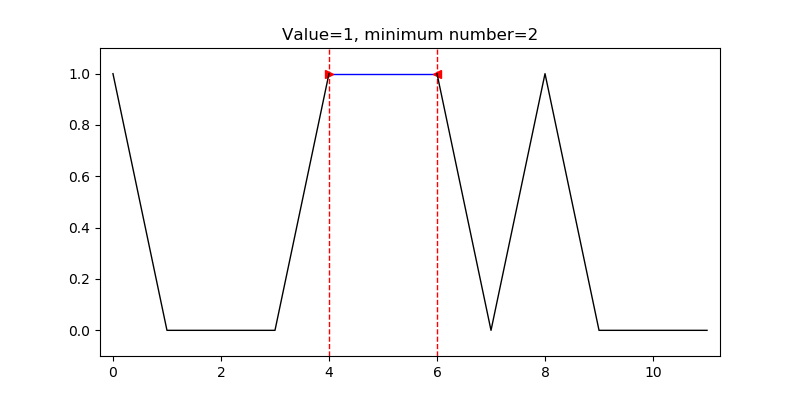

array([[4, 6]])

In [10]:
detect_seq(x, 1, index=True, min_seq=2, show=True)

<IPython.core.display.Javascript object>


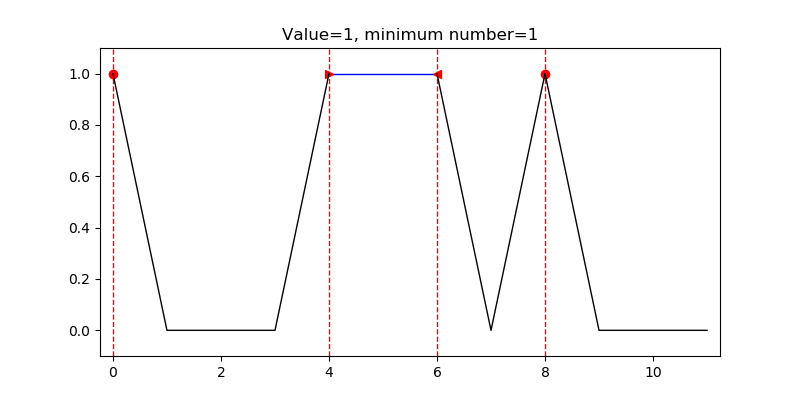

array([ True, False, False, False,  True,  True,  True, False,  True,
       False, False, False])

In [11]:
detect_seq(x, 1, index=False, min_seq=1, show=True)

<IPython.core.display.Javascript object>


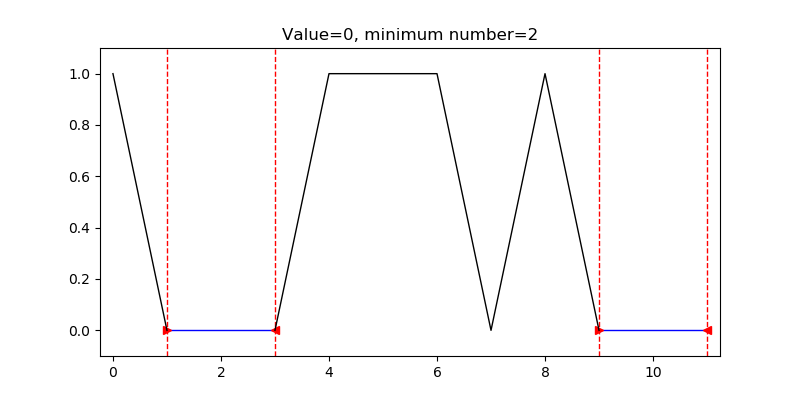

array([[ 1,  3],
       [ 9, 11]])

In [12]:
detect_seq(x, 0, index=True, min_seq=2, show=True)

In [13]:
detect_seq(x, 0, index=True, max_alert=2)

Sequential data equal or longer than 2: ([2], [1 3])
Sequential data equal or longer than 2: ([2], [ 9 11])


array([[ 1,  3],
       [ 7,  7],
       [ 9, 11]])

## Function `rep_missing.py`

In [ ]:
# %load ./../functions/rep_missing.py
#!/usr/bin/env python

"""Replace missing data in different ways."""

import numpy as np
from detect_seq import detect_seq
try:
    from tnorm import tnorm
except:
    print('Function tnorm.py not found. Method "interp" not available.')

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = 'rep_missing.py v.1.0.0 2019/03/17'


def rep_missing(x, value=np.nan, new_value='interp', max_alert=100):
    """Replace missing data in different ways.

    Parameters
    ----------
    x : 1D numpy array_like
        data
    value : number, optional. Default = np.nan
        Value to be found in x marking missing data
    new_value : number or string, optional. Default = 'interp'
        Value or string for the method to use for replacing missing data:
        'delete': delete missing data
        new_value: replace missing data with new_value
        'mean': replace missing data with the mean of the rest of the data
        'median': replace missing data with the median of the rest of the data
        'interp': replace missing data by linear interpolating over them.
    max_alert : number, optional. Default = 100
        Minimal number of sequential data for a message to be printed with
        information about the continuous missing data.
        Set to 0 to not print any message.
        
    Returns
    -------
    y : 1D numpy array_like
        1D array similar to x but with missing data replaced according
        to value or method in new_value.
            
    References
    ----------
    .. [1] http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/rep_missing.ipynb

    Examples
    --------
    >>> x = [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]

    """
    
    y = np.asarray(x)

    idx = detect_seq(y, value, index=False, max_alert=max_alert)

    if idx.any():
        if new_value == 'delete':
            y = y[~idx]
        elif np.isreal(new_value) or np.iscomplex(new_value):
            y[idx] = new_value
        elif new_value == 'mean':
            y[idx] = np.nanmean(y)
        elif new_value == 'median':
            y[idx] = np.nanmedian(y) 
        elif new_value == 'interp':
            y[idx] = np.nan
            y, t, indie = tnorm(y, step=0, k=1, smooth=0, nan_at_ext='replace')
            
    return y
